In [15]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [16]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    # 파일마다 모두 28X28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), "images reseized")
        
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2320 images to be resized.
2320 images reseized
가위 이미지 resize 완료!


In [17]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

2202  images to be resized.
2202  images resized.
바위 이미지 resize 완료!


In [18]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

2270  images to be resized.
2270  images resized.
보 이미지 resize 완료!


In [19]:
# train 데이터
import numpy as np
def load_data(img_path, number_of_data=6792): # 가위바위보 이미지 개수 총합에 주의
    # 가위:0, 바위:1, 보:2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 :1, 보: 2)데이터를 담을 행렬(matrix)영역을 생성한다.
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 :0
        idx = idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2  # 보 :2
        idx = idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 6792)
x_train_norm = x_train/255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 6792 입니다.
x_train shape: (6792, 28, 28, 3)
y_train shape: (6792,)


라벨: 0


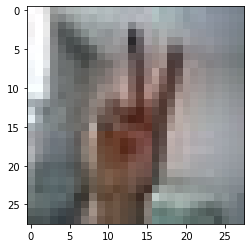

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨:', y_train[0])

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보기 (하이퍼 파라미터 값 변경)
n_channel_1 = 16
n_channel_2 = 32
n_dense = 64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))



model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [22]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
213/213 [==============================] - 9s 22ms/step - loss: 1.0831 - accuracy: 0.3890
Epoch 2/10
213/213 [==============================] - 1s 3ms/step - loss: 0.7271 - accuracy: 0.7021
Epoch 3/10
213/213 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8576
Epoch 4/10
213/213 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.9238
Epoch 5/10
213/213 [==============================] - 1s 3ms/step - loss: 0.1689 - accuracy: 0.9488
Epoch 6/10
213/213 [==============================] - 1s 3ms/step - loss: 0.1156 - accuracy: 0.9660
Epoch 7/10
213/213 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9755
Epoch 8/10
213/213 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9793
Epoch 9/10
213/213 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9898
Epoch 10/10
213/213 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.994

In [23]:
# 모델 테스트
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=2)
print("train_loss: {} ".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

213/213 - 0s - loss: 0.0316 - accuracy: 0.9922
train_loss: 0.03155258297920227 
train_accuracy: 0.9921966791152954


In [24]:
# test 데이터 
import numpy as np
def load_data(img_path, number_of_data=307): # 가위바위보 이미지 개수 총합에 주의
    # 가위:0, 바위:1, 보:2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 :1, 보: 2)데이터를 담을 행렬(matrix)영역을 생성한다.
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 :0
        idx = idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2  # 보 :2
        idx = idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 307)   #  test 파일에 있는 사진 개수와 변수 할당은 x_test, y_test로 바꿔줘야 함.
x_test_norm = x_test/255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 307 입니다.
x_test shape: (307, 28, 28, 3)
y_test shape: (307,)


라벨: 0


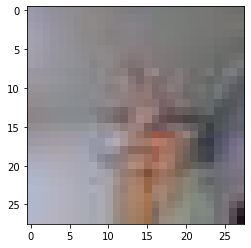

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨:', y_test[0])

In [26]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 0.1110 - accuracy: 0.9739
test_loss: 0.11098266392946243 
test_accuracy: 0.9739413857460022


# 회고  
## 느낀점

 1. 처음에는 노드에 나온 코드를 순서대로 무작정 따라 치기만 하고 결과를 도출해 보았다. 
  + 다른 팀원들은 accuracy가 60% 미만으로 낮게 나온다며 만족해 하지 않았는데 나는 train/test data 둘 다 accuracy가 90% 이상이 나와 만족하며 그냥 제출하려고 했다.(여기서부터 뭔가 잘못되었다는 걸 전혀 감지하지 못했다.)  
    
    
 2. 팀원의 도움으로 내가 작성했던 코드가 잘못되었다는 걸 알게되었다.
  + train 데이터만 모델학습을 시켜야 하는데 test 데이터까지 모델학습을 시킨 걸 알게 되었다. (accuracy가 높게 나오는 걸 이 때 깨달았다.)  
    
  
 3. 하이퍼 파라미터를 다양하게 입력해서 돌려보아도 test 데이터의 accuracy는 50% 이상으로 올라오지 않았다.
  + 하이퍼 파라미터를 줄 때 2의 거듭제곱으로 주면 좋다고 해서 경우의 수로 다양하게 돌려보았지만 어림없었다.  
    
  
 4. 데이터의 양과 질도 중요하다고 하여 처음에 업로드했던 총 1,200개의 데이터는 모두 삭제하고 아지트 사이트에 기범님이 친절하게 올려주신 6,792개의 데이터를 다시 업로드하였다.
  + 역시 처음에 업로드했던 데이터보다 약 7배나 많은 데이터가 학습되서 그런지 결과가 만족스럽게 나왔다.  
    

 5. TF Master시간에 퍼실님께서 데이터가 굉장히 중요하다며 유투브 하나를 추천해주셨다.
  + 유투브 내용에 딥러닝의 성공요건은 모델보다 데이터라고 말하며 코드를 개선하는 것보다 데이터를 개선하는 것이 더욱 효과적이라고 말하고 있다.       

# 결론

### * 데이터셋의 양이 많으면 학습 성능도 좋아진다.
### * 데이터셋의 질이 좋으면 학습 성능도 좋아진다.  
## 뭐니뭐니해도 좋은 데이터를 어떻게 얻을 것이며 어떻게 다루느냐가 가장 중요한 것 같다.